In [1]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('twitter_training.csv')

In [4]:
data.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [5]:
col_names = ['ID', 'Entity', 'Sentiment', 'Content']
df = pd.read_csv('twitter_training.csv', names=col_names)

In [6]:
df.head()

,ID,Entity,Sentiment,Content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [7]:
df.shape

(1000, 4)

In [8]:
df.describe

<bound method NDFrame.describe of        ID               Entity   Sentiment  \
0    3364             Facebook  Irrelevant   
1     352               Amazon     Neutral   
2    8312            Microsoft    Negative   
3    4371                CS-GO    Negative   
4    4433               Google     Neutral   
..    ...                  ...         ...   
995  4891  GrandTheftAuto(GTA)  Irrelevant   
996  4359                CS-GO  Irrelevant   
997  2652          Borderlands    Positive   
998  8069            Microsoft    Positive   
999  6960      johnson&johnson     Neutral   

                                               Content  
0    I mentioned on Facebook that I was struggling ...  
1    BBC News - Amazon boss Jeff Bezos rejects clai...  
2    @Microsoft Why do I pay for WORD when it funct...  
3    CSGO matchmaking is so full of closet hacking,...  
4    Now the President is slapping Americans in the...  
..                                                 ...  
995  ⭐️ Toront

In [9]:
df.isnull().sum()

ID           0
Entity       0
Sentiment    0
Content      0
dtype: int64

In [10]:
df.dropna(axis=0, inplace=True)

In [11]:
df.isnull().sum()

ID           0
Entity       0
Sentiment    0
Content      0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [14]:
df.shape

(1000, 4)

In [15]:
sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts

Sentiment
Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: count, dtype: int64

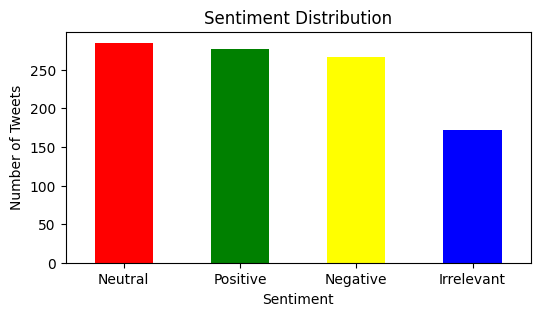

In [16]:
plt.figure(figsize=(6, 3))
sentiment_counts.plot(kind='bar', color=['red', 'green', 'yellow', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()

In [19]:
brand_data = df[df['Entity'].str.contains('Microsoft', case=False)]
brand_sentiment_counts = brand_data['Sentiment'].value_counts()
brand_sentiment_counts

Sentiment
Positive      14
Negative       7
Neutral        6
Irrelevant     1
Name: count, dtype: int64

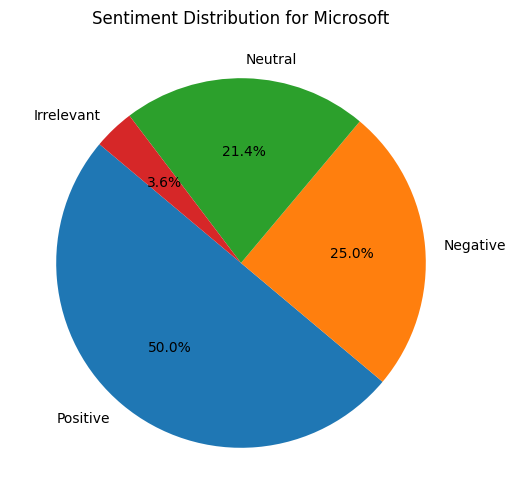

In [20]:
plt.figure(figsize=(6, 6))
plt.pie(brand_sentiment_counts, labels=brand_sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution for Microsoft')
plt.show()